In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml("mnist_784") 

In [3]:
X, y = dataset["data"], dataset["target"] 

In [4]:
digits = 10
examples = y.shape[0]
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [5]:
m = 60000  
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

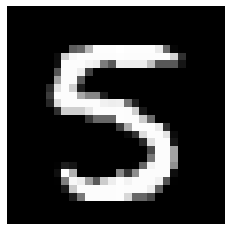

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [9]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [10]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [11]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [12]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

<ipython-input-10-b3dbf6f23306>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


Epoch 0 cost:  6.160351982680548
Epoch 100 cost:  0.8577676589035659
Epoch 200 cost:  0.6674826030591977
Epoch 300 cost:  0.5883855717357045
Epoch 400 cost:  0.545261728605372
Epoch 500 cost:  0.5163942182161299
Epoch 600 cost:  0.49518591007119733
Epoch 700 cost:  0.47913051673441887
Epoch 800 cost:  0.4671765852753099
Epoch 900 cost:  0.45677635734491895
Epoch 1000 cost:  0.44766989104310445
Epoch 1100 cost:  0.43841004767012365
Epoch 1200 cost:  0.4321962535711008
Epoch 1300 cost:  0.4278537547757465
Epoch 1400 cost:  0.421505128215935
Epoch 1500 cost:  0.4192773139116046
Epoch 1600 cost:  0.41177605366809084
Epoch 1700 cost:  0.4092711832246552
Epoch 1800 cost:  0.4069685522061932
Epoch 1900 cost:  0.40279483125591703
Final cost: 0.39841877915631807


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 919    0   24   10    4   20   25    3   12   14]
 [   0 1091   17    1    4    3    3   12    7    8]
 [   8    8  861   32    5    7   20   25   13    7]
 [   8    8   26  847    4   67    2   12   33   12]
 [   0    0   12    4  842   25   19    9   10   76]
 [  17    2   10   54    3  669   30    4   55   10]
 [  12    2   25   11   17   21  850    0   22    2]
 [   6    4   15   16    9    8    3  916   16   51]
 [   9   20   31   24   16   58    6    8  785   13]
 [   1    0   11   11   78   14    0   39   21  816]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1031
           1       0.96      0.95      0.96      1146
           2       0.83      0.87      0.85       986
           3       0.84      0.83      0.83      1019
           4       0.86      0.84      0.85       997
           5       0.75      0.78      0.77       854
           6       0.89      0.88      0.89       962
           7       0.89      0.88   

<ipython-input-10-b3dbf6f23306>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))
